max_depth=2, 정확도=0.7922
max_depth=3, 정확도=0.7727
max_depth=4, 정확도=0.7727
max_depth=5, 정확도=0.7662
max_depth=6, 정확도=0.7662
max_depth=7, 정확도=0.7662
max_depth=8, 정확도=0.7468
max_depth=9, 정확도=0.7532
max_depth=10, 정확도=0.7468
max_depth=11, 정확도=0.7468
max_depth=12, 정확도=0.7338
max_depth=13, 정확도=0.7468
max_depth=14, 정확도=0.7273
max_depth=15, 정확도=0.7338
max_depth=16, 정확도=0.7208
max_depth=17, 정확도=0.7273
max_depth=18, 정확도=0.7338
max_depth=19, 정확도=0.7208
max_depth=20, 정확도=0.7208

>> 최적 max_depth = 2  (정확도 = 0.7922)


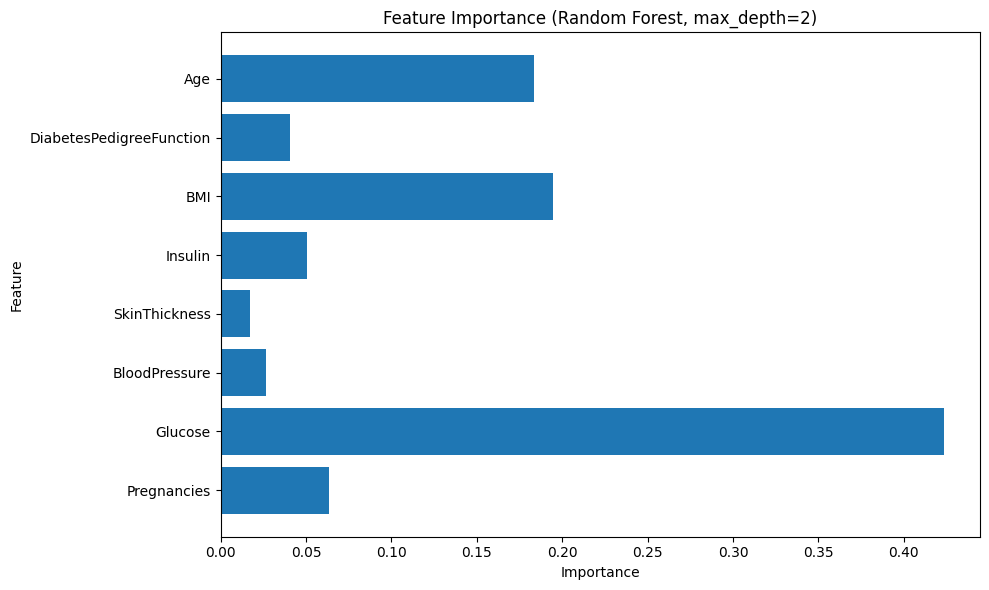

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

df = pd.read_csv("d:/data/diabetes/diabetes.csv")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depth_list = range(2, 21)
accuracy_list = []

for depth in depth_list:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    print(f"max_depth={depth}, 정확도={acc:.4f}")

best_depth = depth_list[accuracy_list.index(max(accuracy_list))]
print(f"\n>> 최적 max_depth = {best_depth}  (정확도 = {max(accuracy_list):.4f})")

best_model = RandomForestClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, "d:/data/diabetes/diabetes_model.pkl")

importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title(f"Feature Importance (Random Forest, max_depth={best_depth})")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
